<a href="https://colab.research.google.com/github/rioAgustian/computational_physics/blob/main/seminar_progkom_numerik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pemrograman Komputer dalam Metode Numerik**

**Rio Agustian Gilang Fernando, Fisika**

**Fakultas Matematika dan Ilmu Pengetahuan Alam**

**Universitas Negeri Semarang**


## **1. Galat**

Salah mengukur 5 cm bolpoin, tidak sama dengan salah mengukur 5 cm jembatan Suramadu.

## **2. Turunan Numerik**

Kita akan bahas tentang forward difference approximation dan central difference.

Forward difference:
\begin{align}
f'(x_i) ≈ \frac{f(x_i+h)- f(x_i)}{h}
\end{align}

Central difference:
\begin{align}
f'(x_i) ≈ \frac{f(x_i+h)- f(x_i-h)}{2h}
\end{align}

### **2.1. Bagaimana cara mencari turunan dari $\cos x$?**

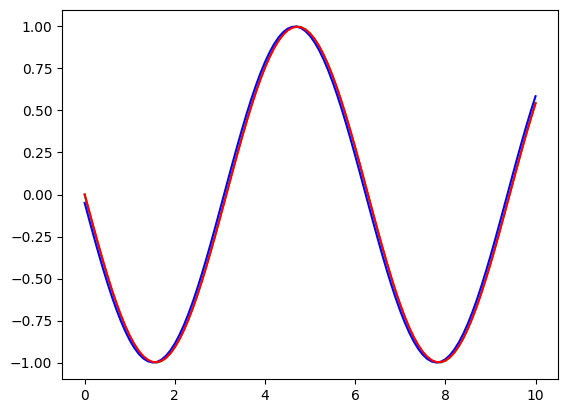

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return np.cos(x)

def df(x):
  return -np.sin(x)

h = 0.1
x = np.arange(0, 10+h, h)

y0 = df(x)
y1 = (f(x+h) - f(x))/h
y2 = (f(x+h) - f(x-h))/(2*h)

plt.plot(x, y0, "g")
plt.plot(x, y1, "b")
plt.plot(x, y2, "r")
plt.show()

### **2.2. Pro gamer moves**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


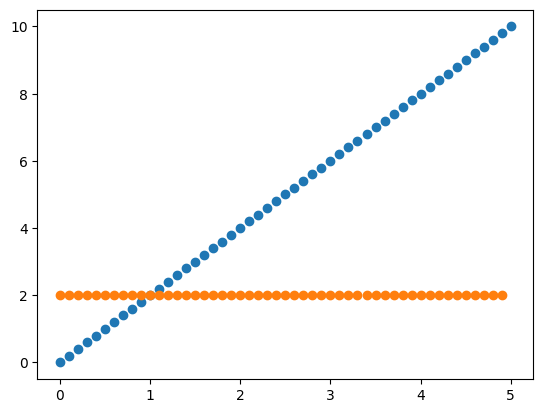

In [ ]:
path = r"/gdrive/MyDrive/ASEMESTER_6/1LUAR_KULIAH/PELATIHAN PROGRAMMING/kecepatan.csv"
x, y = np.loadtxt(path, unpack=True, delimiter=";")

h = 0.1
dy = (y[1:] - y[:-1])/h

plt.scatter(x, y)
plt.scatter(x[:-1], dy)
plt.show()

## **3. Integral Numerik**

Kita bahas metode yang paling sederhana.

\begin{align}
\int_a^b f(x) dx \rightarrow \Sigma_a^b f(x)\Delta x
\end{align}

### **3.1. Bagaimana mencari nilai integral $\sin x$?**



In [ ]:
h  =  0.5
a  =  0
b  =  np.pi
x  =  np.arange(a, b, h)
fx =  np.sin(x)

# Berapa banyak data yang ada pada y?
n = len(fx)

I1 = 0
for i in range(n):
  I1 = I1 + h * fx[i]
  print(I1)

# Ini solusi analitik. Silahkan dicari sendiri
I2 = -np.cos(a) + np.cos(b)

0.0
0.2397127693021015
0.6604482617060498
1.159195755008077
1.6138444684209179
1.913080540472896
1.9836405445028298


### **3.2. Pro gamer moves**

\begin{align}
m = \int_{a}^{b} \rho A \, dx
\end{align}

In [ ]:
path = r"/gdrive/MyDrive/ASEMESTER_6/1LUAR_KULIAH/PELATIHAN PROGRAMMING/logam.txt"
x, rho, A = np.loadtxt(path, unpack=True, delimiter=",")
h = np.diff(x)

fx = rho * A

I = np.sum(h * fx[1:])

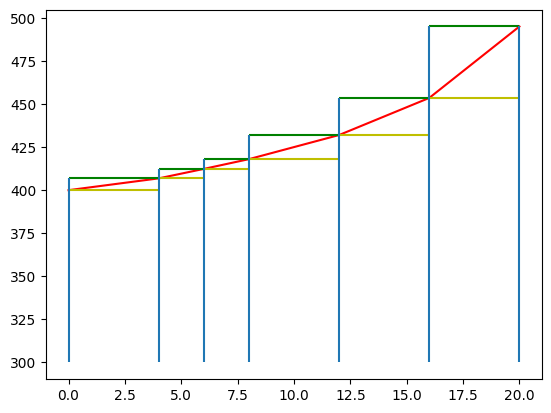

In [ ]:
plt.plot(x, fx, "r");
for i in range(6):
  plt.hlines(fx[i+1], x[i+1], x[i], "g")
  plt.hlines(fx[i], x[i+1], x[i], "y")
  plt.vlines(x[i], 300, fx[i+1])

plt.vlines(x[6], 300, fx[6])
plt.show()

## **4. Mencari Akar**

Metode yang akan kita bahas adalah metode secant.

\begin{align}
x_{i+1}=x_i - \frac{f(x_i)(x_{i-1}-x_i)}{f(x_{i-1})-f(x_i)}
\end{align}

### **4.1. Berapa nilai dari x untuk $x^2-4=0$?**

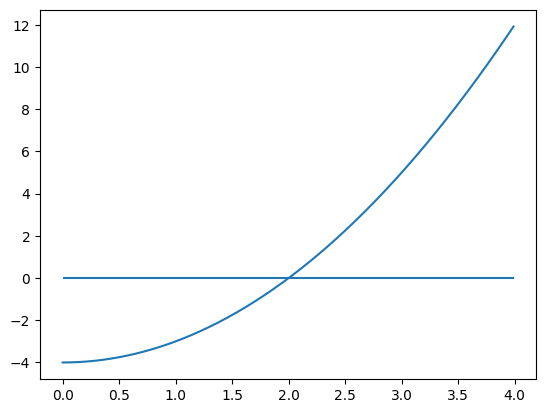

In [ ]:
# Fungsi f(x)
def f(x):
  return x**2 - 4

x = np.arange(0, 4, 0.01)
y = f(x)

plt.plot(x, y)
plt.hlines(0, np.min(x), np.max(x))
plt.show()

In [ ]:
# Parameter metode secant
x0  = 1
x1  = 6
tol = 0.01
err = 100

# Loop
while err >= tol:
  # Menghitung akar
  x2 = x1 - (f(x1)*(x0-x1))/(f(x0)-f(x1))

  # Menghitung error
  err = np.abs((x2-x1)/x1)*100

  # Update nilai x0 dan x1
  x0 = x1
  x1 = x2
  i = i + 1

print(x2)

2.000000074421774


### **4.2. Pro gamer moves**

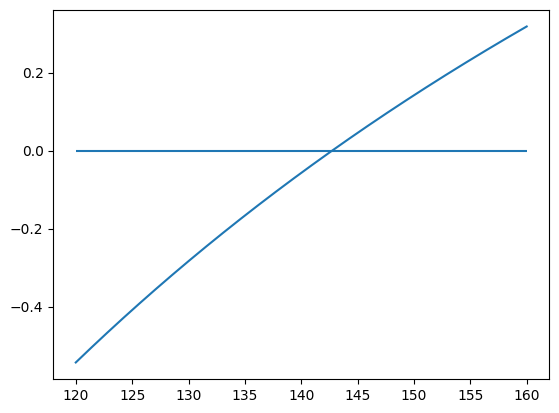

In [ ]:
# Fungsi f(x)
def f(x):
  g = 9.81 # m/s^2
  c = 0.25 # kg/m
  v = 36   # m/s
  t = 4    # s
  return np.sqrt(g*x/c)*np.tanh(np.sqrt(g*c/x)*t)-v

x = np.arange(120, 160, 0.01)
y = f(x)

plt.plot(x, y)
plt.hlines(0, np.min(x), np.max(x))
plt.show()

In [ ]:
# Parameter metode secant
x0  = 100   # taksiran awal
x1  = 200   # taksiran awal
tol = 0.1   # toleransi error (%)
i   = 1     # iterasi ke-i
err = 100   # error (%)
max = 50    # batas iterasi maksimum

# Header output
print("iter. \t xr \t\t error (%)")

# Loop sampai 100 iterasi atau sampai mencapai batas toleransi
while not (i > 100 or err <= tol):
  x2 = x1 - (f(x1)*(x0-x1))/(f(x0)-f(x1))

  # Fromating output
  print("{0:d} \t {1:.8f} \t {2:.8f}".format(i,x2,err))

  err = np.abs((x2-x1)/x1)*100
  x0 = x1
  x1 = x2
  i = i + 1
print("\nAkar persamaan = ", x2)

iter. 	 xr 		 error (%)
1 	 158.19104345 	 100.00000000
2 	 137.15030063 	 20.90447828
3 	 143.28283986 	 13.30084331
4 	 142.75686865 	 4.47140050
5 	 142.73756689 	 0.36708598

Akar persamaan =  142.7375668865741
